# Predicting likelihood of loan default using Machine Learning Classifiers using UCI Dataset

## by Christopher Forsythe, Daniel Deleon, Jose Garcia

### Introduction

In this project our group aims to explore UCI's dataset for credit card debt. We will explore the correlation each feature of the data has with each other. We want to better understand what features have an impact on the outcome that a customer will default on their payments. Our first steps are to explore the data to understand what information we are working with. We will then process the data by cleaning unusable data such as na values and/or missing data followed by scaling numeric data accordingly. From there we aim to test a few different predictors and comparing our accuracy from these methods. By the end of this project we hope to have gained a better understanding of the data and what feature sets work well with each other, as well as understanding what prediction method is best for data sets that look similar to this one. Our goal is to have 90% accuracy score on our test set and a strong understanding of how we can/will achieve that score.  

### Exploration

In [310]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [311]:
df = pd.read_csv("default_cc_train.csv")

Looking at a summary of the data

In [312]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,14977.844760,167244.387200,1.604360,1.853920,1.552920,35.461320,-0.019000,-0.134400,-0.16464,-0.218280,...,43300.725640,40275.052440,38915.765600,5672.70844,5.866362e+03,5220.811240,4821.460360,4838.123440,5209.749440,0.220560
std,8662.539837,129543.574364,0.488998,0.789408,0.521776,9.197019,1.119665,1.194719,1.19609,1.167651,...,64376.490314,60640.453002,59585.622139,16002.16693,2.011322e+04,17116.197319,15194.636443,15246.074819,17747.788739,0.414633
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.00000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7449.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,2314.750000,1747.000000,1240.000000,990.00000,8.360000e+02,390.000000,299.000000,264.000000,107.750000,0.000000
50%,14987.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.00000,0.000000,...,19119.500000,18146.000000,17115.500000,2102.50000,2.016000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22467.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.00000,0.000000,...,54591.500000,50245.500000,49319.250000,5011.00000,5.000000e+03,4513.000000,4023.750000,4057.250000,4006.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.00000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.00000,1.227082e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


Lets check to see if there is any NA's in the dataset

In [313]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

I want to get an idea of the age distribution to see if maybe it could have an effect on defaulting on payments. I ended up removing ages > 73 to make the bins better because there are only 3 people older than 73 so I didn't have enough data. This data seems to not really have any significant correlation

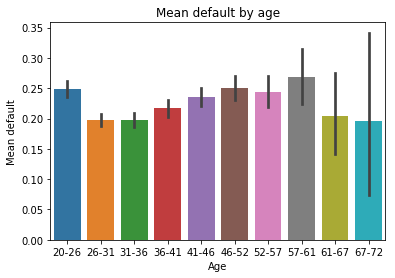

In [314]:
labels = ["20-26", "26-31", "31-36", "36-41", "41-46", "46-52", "52-57", "57-61", "61-67","67-72"]
binned_ages = pd.cut(df[df.AGE < 73].AGE, 10, labels=labels)
sns.barplot(binned_ages, 'default.payment.next.month', data=df[df.AGE < 73], )
plt.title("Mean default by age")
plt.ylabel("Mean default")
plt.xlabel("Age")
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


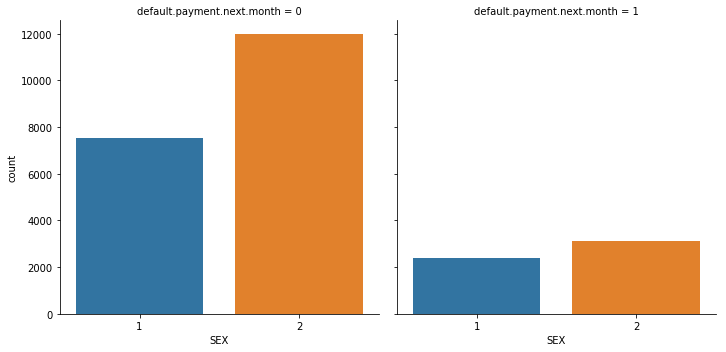

In [315]:
sns.factorplot(x='SEX', col='default.payment.next.month', data=df, kind='count')
plt.show()

Here we can see the amount of people 

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


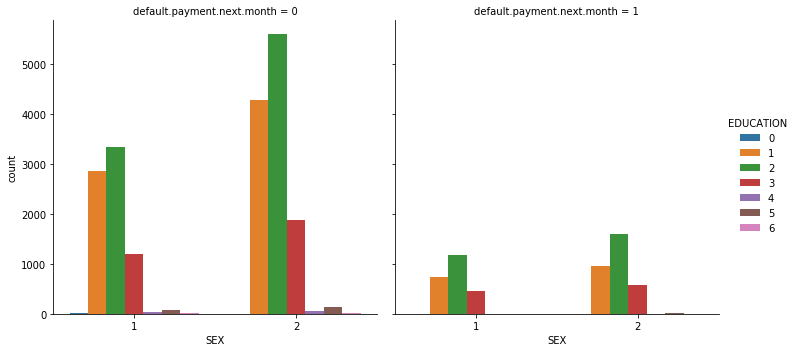

In [316]:
sns.factorplot(x='SEX', hue='EDUCATION', col='default.payment.next.month', data=df, kind='count')
plt.show()

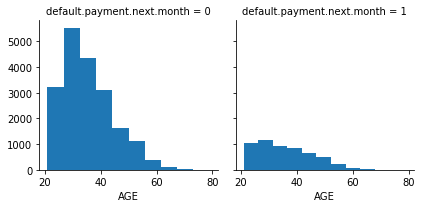

In [317]:
g = sns.FacetGrid(df, col = 'default.payment.next.month')
g.map(plt.hist, 'AGE')
plt.show()

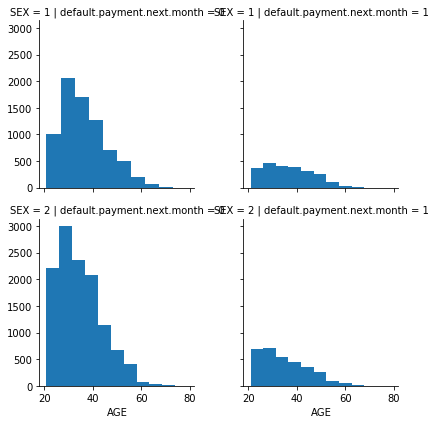

In [318]:
g = sns.FacetGrid(df, col = 'default.payment.next.month', row = 'SEX')
g.map(plt.hist, 'AGE')
plt.show()

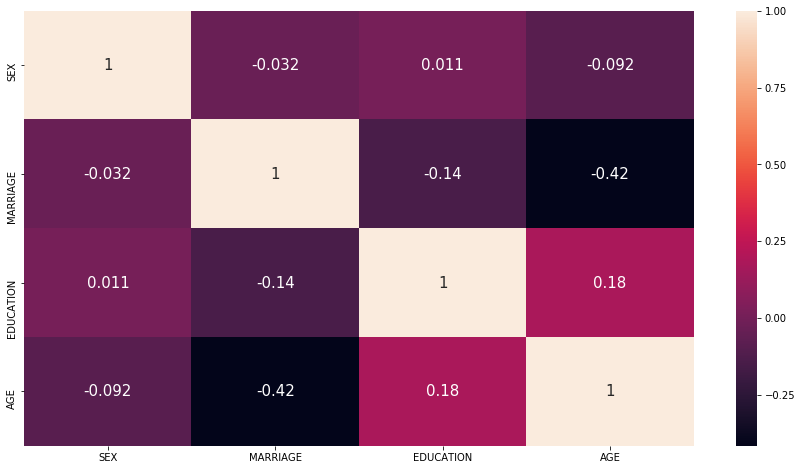

In [319]:
n_df = df[['SEX','MARRIAGE', 'EDUCATION', 'AGE']].copy()
corr = n_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws={"size": 15})
plt.show()

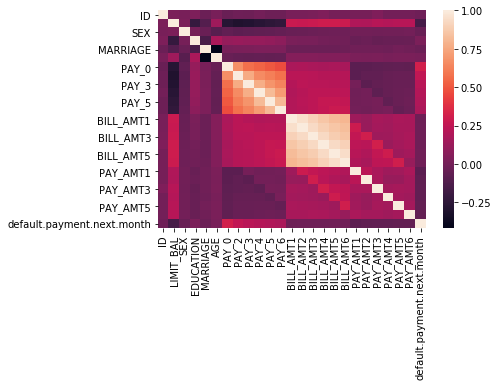

In [320]:
sns.heatmap(df.corr())

I wanted to see if their was a correlation between age and balance limit so that way I could see if potentially there was a correlation between higher balance limits being correlated with likelyhood of defaulting on a payment. It looks like there is no correlation between age and balance limit, but there still could be a correlation between balance limit and chance of defaulting

Text(0.5,0,'Age')

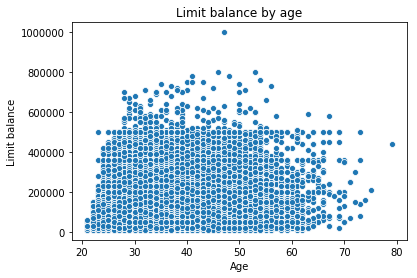

In [321]:
sns.scatterplot("AGE","LIMIT_BAL", data=df)
plt.title("Limit balance by age")
plt.ylabel("Limit balance")
plt.xlabel("Age")

Looking to see if there is any correlation between balance limit and chance of defaulting on payments. It looks like there *might* be a correlation that lower max balances have a higher chance of defaulting, but it's not perfectly clear here.

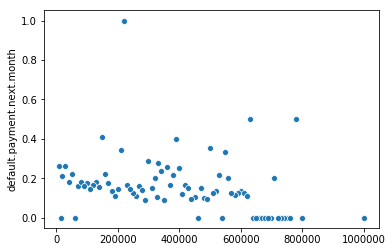

In [322]:
grouped = df.groupby("LIMIT_BAL").mean()
sns.scatterplot(df.LIMIT_BAL.unique(), grouped["default.payment.next.month"])

One thing that would be interesting would be to look at the correlation between each column in the dataset. By the looks of it the things with the strongest correlations are the bill_amts. However this doesn't mean very much to us since over time the bill amounts would technically be correlated with each other anyways since they will be going up or down. Payment amounts are also strongly correlated which also makes since because these are the payments over six months which will of course correlate with each other. Something that may be interesting to explore is the payment vs default over the six months. Since the correlation is strong for the first month and weakens each month.

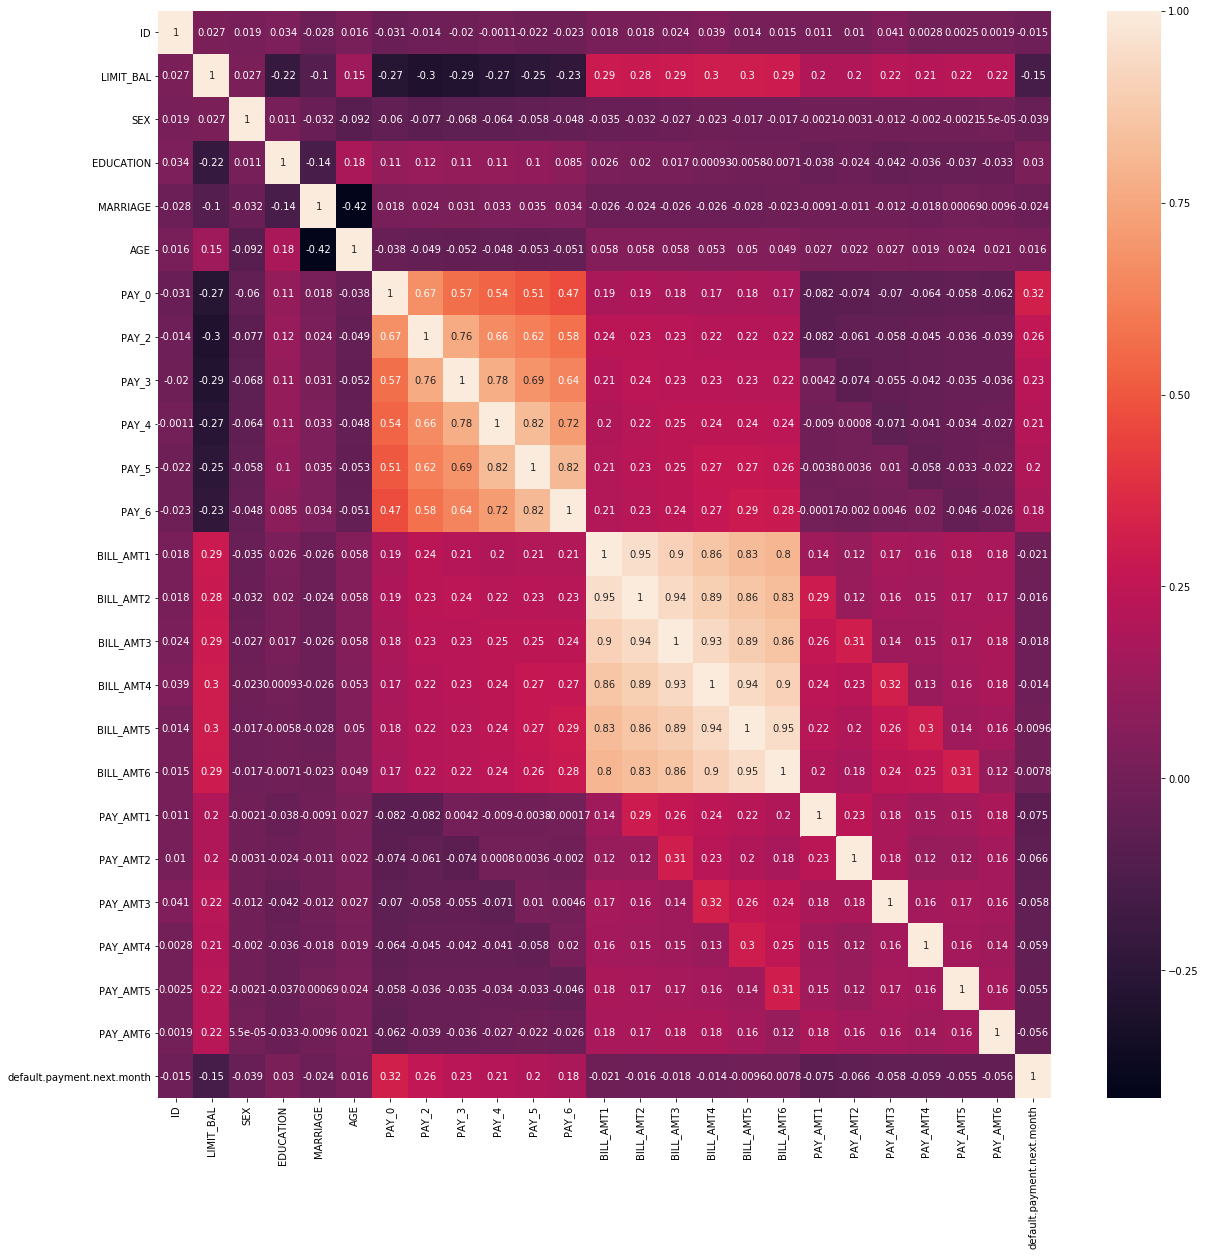

In [323]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

The overall graphs look to be the same. So this gives me the idea that specific months don't really change how many people default on payments. Overall the distribution stays the same

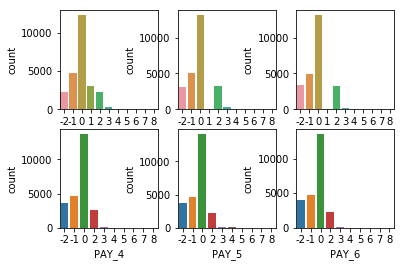

In [324]:
payments = df.iloc[:,6:12]
for i, column in enumerate(payments):
    plt.subplot(2, 3, i+1)
    sns.countplot(payments[column])

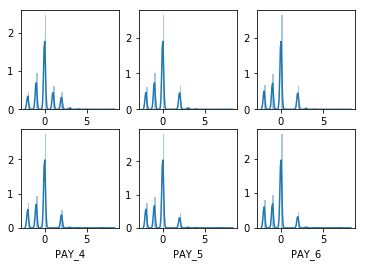

In [325]:
for i, column in enumerate(payments):
    plt.subplot(2, 3, i+1)
    sns.distplot(payments[column])

In [326]:
defaults = 0
counts = []
for _, row in payments.iterrows():
    count = 0
    for column in row:
        if column > 0:
            count += 1
    counts.append(count)
    if count > 1:
        defaults += 1

df["def_counts"] = counts
print("Percentage of people that default more than once {:.2f}%".format(defaults/len(payments) * 100))        

Percentage of people that default more than once 18.80%


The main interesting thing about this plot is that people there's a jump in counts of people that didn't make payments for six months straight. It would be interesting to check likelyhood of defaulting based on that.

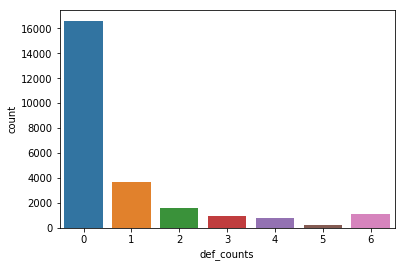

In [327]:
sns.countplot(df.def_counts)

It looks like most people that didnt make payments for six months straight are also extremely likely to default
which gives me the idea that my derived feature of how many months someone missed a payment will help a model 
significantly

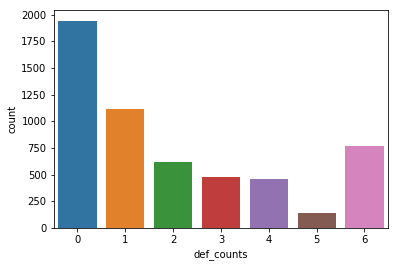

In [328]:
sns.countplot(df[df["default.payment.next.month"] > .5].def_counts)

### Preprocessing

In [329]:
from sklearn import preprocessing
X = df.drop(columns="default.payment.next.month")
y = df["default.payment.next.month"]
X = pd.get_dummies(X)
X = preprocessing.scale(X)

### Experiments/Dimensionality Reduction

### Ensemble Learning

### SVM

In [334]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size = 0.5, train_size = .5 )
svm_clf = SVC()
svm_clf.fit(X_train_val, y_train_val)
y_pred = svm_clf.predict(X_test)
print(svm_clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.82096


### Base models

In [333]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train_val, y_train_val)
y_pred = dtc.predict(X_test)
print(dtc.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.71904


In [335]:
from sklearn import ensemble

abc = ensemble.AdaBoostClassifier()
abc.fit(X_train_val, y_train_val)
y_pred = abc.predict(X_test)
print(abc.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.81912


### Gridsearch

### Analyses

### Performance